In [ ]:
# Density Based Clustering : 
    # In density based clustering, we partition points into dense regions separated by not so-dense regions. Clusters will be on dense regision and npt so-densed regions will separate these clusters.
    # How do we measure density and dense region ? 
    # Take a point, create an circle with radius epsilon. How many points will be in this circle will determine the density.
    # If dense region, then circle of radius epsilon will contain at least minpts(parameter) points,ie. we have to have minpts number of points in the circle to say it is dense region.
    # It divides our data points into 3 different categories. First one is core point. If circle of radius epsilon around a point contains at least minpts neighbours, then it is core datapoint. 
    # Border datapoint is a point which does not have enough minpts around its circle of radius epsilon but includes a core point within it.
    # Noise point is neither core points nor border points.
    # We place an edge between two core points q and p if they are within distance epsilon.
    # Density connected : A point p is density connected to a point q if there is path of edges from p to q. 
    # Model covers whole data points and chooses cores, borders and noises. Then it eliminates noise points and does not assign them to a cluster.
    # For every core point p that has not been assigned to a cluster, create a new cluster with the point p and all the points that are density-connected to p.
    # Then assign border points to the clusters of the closest core point.
    
    # Determinin Eps and Minpts : Try and fail or fixed MinPts. Plot sorted distance of every point to its kth nearest neighbor. Assume if minpts 4 then choose 4th.
    # Resistance to noise.
    # If you dont choose appropriate minpts or Eps and if clusters include different densities, then you may end up with just one cluster.
    # If density is not uniform and some clusters are more dense then the importance of minpts and eps increases. Varyin densities and high dimensional data are challenging.
    # It can works pretty well with models like UMAP.


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN


In [3]:
X, _ = make_blobs(n_samples = 2000, n_features = 2, centers = 6, random_state = 7)


In [5]:
dbscan = DBSCAN() # deafult epsilon 0.5  and min_samples(minpts) = 5
dbscan.fit(X)

DBSCAN()

In [6]:
labels = dbscan.labels_

Number of clusters :  8


<AxesSubplot:>

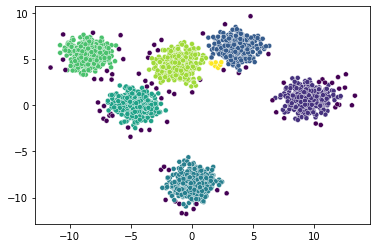

In [7]:
print("Number of clusters : ", len(np.unique(labels)))

sns.scatterplot(x = X[:,0], y = X[:,1], c = labels, s = 25, cmap = "viridis") # Created 7 cluster and with noise 8.


<AxesSubplot:>

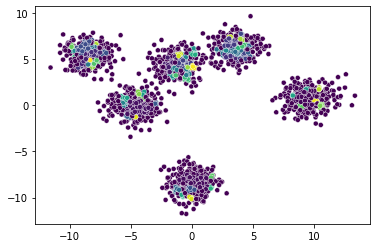

In [8]:
# change epsilon to 0.2

dbscan = DBSCAN(eps = 0.2)
dbscan.fit(X)

labels = dbscan.labels_

sns.scatterplot(x= X[:,0], y = X[:,1], c = labels, s = 25, cmap = "viridis")

In [10]:
cluster_num  = len(np.unique(labels)) # It created 66 different clusters.
cluster_num

66

In [11]:
# change epsilon to 0.9
dbscan = DBSCAN(eps = 0.9) 
dbscan.fit(X)

DBSCAN(eps=0.9)

5

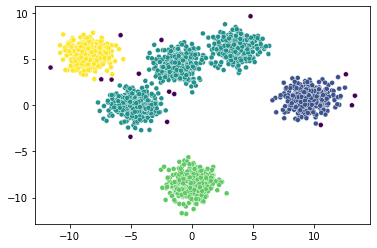

In [13]:
labels = dbscan.labels_

sns.scatterplot(x= X[:,0], y = X[:,1], c = labels, s = 25, cmap = "viridis")

cluster_num  = len(np.unique(labels))
cluster_num # created 5 clusters.

8

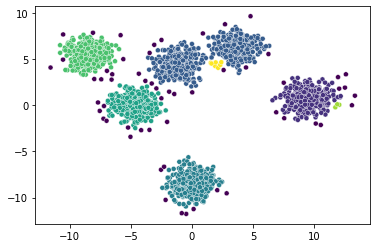

In [14]:
# MinSamples = 3

dbscan = DBSCAN(min_samples = 3) # epsilon 0.5
dbscan.fit(X)

labels = dbscan.labels_

sns.scatterplot(x= X[:,0], y = X[:,1], c = labels, s = 25, cmap = "viridis")

cluster_num  = len(np.unique(labels))
cluster_num

2

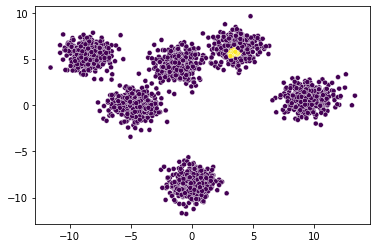

In [15]:
# Minsamples = 50

dbscan = DBSCAN(min_samples = 50) # epsilon değişti.
dbscan.fit(X)

labels = dbscan.labels_

sns.scatterplot(x= X[:,0], y = X[:,1], c = labels, s = 25, cmap = "viridis")

cluster_num  = len(np.unique(labels))
cluster_num

2

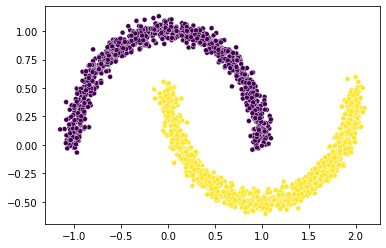

In [19]:
# DBSCAN CRESCENT SHAPE

X , _ = make_moons(2000,noise = 0.05,random_state = 0)

dbscan = DBSCAN(eps = 0.3)
dbscan.fit(X)

labels = dbscan.labels_

sns.scatterplot(x= X[:,0], y = X[:,1], c = labels, s = 25, cmap = "viridis")

cluster_num  = len(np.unique(labels))
cluster_num

1

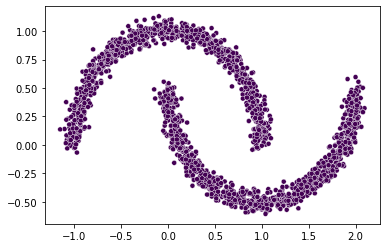

In [20]:
# DBSCAN CRESCENT SHAPE EPSILON CHANGED TO A LARGER NUMBER.

X , _ = make_moons(2000,noise = 0.05,random_state = 0)

dbscan = DBSCAN(eps = 0.5)
dbscan.fit(X)

labels = dbscan.labels_

sns.scatterplot(x= X[:,0], y = X[:,1], c = labels, s = 25, cmap = "viridis")

cluster_num  = len(np.unique(labels))
cluster_num # Every points is in same cluster and didnt separate the shape and should decrease epsilon.